<a href="https://colab.research.google.com/github/rishurnjan/flower_calssification_CV/blob/main/flower_classification_using_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold FLOWER CLASSIFICATION USING DATA AUGMENTATION text**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir

228813984/228813984 [==============================] - 2s 0us/step


'/root/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8960904651_9a0b727258.jpg')]

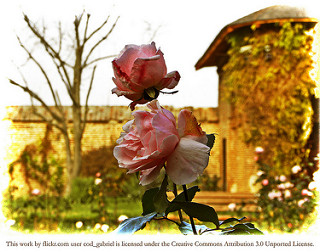

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [ ]:
flower_labels={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [ ]:
X,y=[],[]

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_labels[flower_name])

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(X)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 93s 1s/step - loss: 1.3934 - accuracy: 0.4306
Epoch 2/10
86/86 [==============================] - 93s 1s/step - loss: 1.0281 - accuracy: 0.5810
Epoch 3/10
86/86 [==============================] - 90s 1s/step - loss: 0.8461 - accuracy: 0.6762
Epoch 4/10
86/86 [==============================] - 90s 1s/step - loss: 0.6975 - accuracy: 0.7355
Epoch 5/10
86/86 [==============================] - 100s 1s/step - loss: 0.4935 - accuracy: 0.8230
Epoch 6/10
86/86 [==============================] - 93s 1s/step - loss: 0.3059 - accuracy: 0.8990
Epoch 7/10
86/86 [==============================] - 102s 1s/step - loss: 0.1939 - accuracy: 0.9404
Epoch 8/10
86/86 [==============================] - 94s 1s/step - loss: 0.0961 - accuracy: 0.9713
Epoch 9/10
86/86 [==============================] - 96s 1s/step - loss: 0.0812 - accuracy: 0.9767
Epoch 10/10
86/86 [==============================] - 95s 1s/step - loss: 0.0878 - accuracy: 0.9753


In [ ]:
y_pred=model.predict(X_test_scaled)

29/29 [==============================] - 10s 319ms/step


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 310ms/step - loss: 1.9681 - accuracy: 0.6057


[1.9680829048156738, 0.6056644916534424]

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

presicion = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average=None)

print(f"Precision: {presicion}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.599098692011314
Recall: 0.6116226989740932
F1-score: [0.47468354 0.61919505 0.68172485 0.71005917 0.51075269]


https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom.-> diff data augmentation


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",input_shape=(180,180,3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [ ]:
model_2=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

using more epocs can clearly boost the accuracy here. But high computation requires likewise system as well.

In [ ]:
model_2.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 132s 2s/step - loss: 1.5117 - accuracy: 0.4026
Epoch 2/10
86/86 [==============================] - 116s 1s/step - loss: 1.0798 - accuracy: 0.5650
Epoch 3/10
86/86 [==============================] - 104s 1s/step - loss: 0.9778 - accuracy: 0.6086
Epoch 4/10
86/86 [==============================] - 107s 1s/step - loss: 0.9035 - accuracy: 0.6468
Epoch 5/10
86/86 [==============================] - 104s 1s/step - loss: 0.8447 - accuracy: 0.6704
Epoch 6/10
86/86 [==============================] - 106s 1s/step - loss: 0.8137 - accuracy: 0.6846
Epoch 7/10
86/86 [==============================] - 105s 1s/step - loss: 0.7456 - accuracy: 0.7188
Epoch 8/10
86/86 [==============================] - 106s 1s/step - loss: 0.7029 - accuracy: 0.7282
Epoch 9/10
86/86 [==============================] - 100s 1s/step - loss: 0.6732 - accuracy: 0.7409
Epoch 10/10
86/86 [==============================] - 104s 1s/step - loss: 0.6602 - accuracy: 0.7464


In [ ]:
model_2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 387ms/step - loss: 0.9337 - accuracy: 0.6699


[0.9337169528007507, 0.6699346303939819]